# convert from tsv to csv
from __future__ import print_function, division, absolute_import

import sys
import csvkit as csv

file_name = "messer_SHC_note_final_2.tsv"    
out_file = open("SHC_note2.csv",'w')
i=0
with open(file_name,'rb') as tsvin, open('new.csv', 'wb') as csvout:
    tsvin = csv.reader(tsvin, delimiter='\t')
    csvout = csv.writer(csvout)

    for row in tsvin:
        #print(type(row))
        if len(row) > 0:
            csvout.writerow(row)
        #i += 1
        #if i > 3:
        #    break


#get rid of progress notes and others
from __future__ import print_function, division, absolute_import

import sys
import csvkit as csv

file_name = "SHC_ALL_NOTES_RAW.csv"    
out_file = open("SHC_ALL_NOTES_FILTERED.csv",'w')
i=1
        
with open(file_name) as cf: 
    reader = csv.DictReader(cf) 
    outfieldnames = reader.fieldnames 
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='*') 
    writer.writeheader()
    for line in reader:
        i += 1
        eeg_no=""
        if (line['Note'] is None) or (len(line['Note']) == 0):
            print("malformed at %s", i)
            continue
        notebody = line['Note'].lower()
        notetype = line['Note_type_Desc'].lower()
        if "EEG Number" in notebody:
            writer.writerow(line)
            continue
        if "standard international system 10-20" in notebody:
            writer.writerow(line)
            continue
        if "standard international 10-20" in notebody:
            writer.writerow(line)
            continue
        if "conditions of recording" in notebody:
            writer.writerow(line)
            continue
        if "conditions of the recording" in notebody:
            writer.writerow(line)
            continue
        if "eeg #" in notebody:
            writer.writerow(line)
            continue
            
        if "neurodiagnostic" in notetype:
            writer.writerow(line)
            continue
        if "outpatient procedure" in notetype:
            writer.writerow(line)
            continue
        #print(type(line['Note']))
        #print("line %s" + notebody[:100], i )
        #print()
        #if i > 1900:
        #    break
    #print(eeg_no)    
    #i += 1
    #if (i>600):
    #    break

# normal versus abn
from __future__ import print_function, division, absolute_import

import sys
import csvkit as csv
import re
import string

file_name = "SHC_ALL_NOTES_FILTERED.csv"    
out_file = open("SHC_ALL_NOTES_IMPRESS.csv",'w')
eegImprPattern = r'(?:\
Impression and Summary:|IMPRESSION and SUMMARY:|IMPRESSION and CONCLUSIONS:\
|IMPRESSION|IMPRESSIONS|IMPRESSION:|Impression:|IMPRESSIONS:\
|INTERPRETATIONS:|INTERPRETATION:|Interpretation:\
|CONCLUSION:|CONCLUSIONS:|Conclusion:\
|Summary:|SUMMARY:)\s*(?P<eegno>[\w\d \.\-\(\),]+)'
re_eegno = re.compile(eegImprPattern, re.DOTALL|re.MULTILINE)
eegImprPattern = r'(?:\
Impression and Summary:|IMPRESSION and SUMMARY:|IMPRESSION and CONCLUSIONS:\
|IMPRESSION|IMPRESSIONS|IMPRESSION:|Impression:|IMPRESSIONS:|Impression|impression:\
|INTERPRETATIONS:|INTERPRETATION:|Interpretation\
|CONCLUSION:|CONCLUSIONS:|Conclusion:\
|Summary:|SUMMARY:|SUMMARY|Summary)\s*(?P<eegno>[\w\d \.\-\(\),]+)'
re_eegnoLoose = re.compile(eegImprPattern, re.DOTALL|re.MULTILINE)


def findTrueImpression(eeg_no,line,i):
    wordlist = eeg_no.lower().split()
    words = [''.join(c for c in s if c not in string.punctuation) for s in wordlist]
    #print(words)
    if "normal" in words and "abnormal" in words:
        #equivocal
        result = findSpecificPhrases(eeg_no,line,i)
        if (result == False):
            line['impression'] = "unknown"
            print(repr(i) + "EQUIVOCAL"+  eeg_no)
            print()
            
    elif "abnormal" in words:
        line['impression'] = "abnormal"
    elif "status" in words:
        line['impression'] = "abnormal"
    elif "seizure" in words and "nonepileptic" in words:
        result = findSpecificPhrases(eeg_no,line,i)
        if (result == False):
            line['impression'] = "unknown"
            print(repr(i)  +"UNKNOWN-"+ eeg_no)
            print()
    elif "nonepileptic" in words:
            line['impression'] = "normal"
    elif "seizure" in words:
            line['impression'] = "abnormal"
    elif "slowing" in words:
        line['impression'] = "abnormal"
    elif "normal" in words:
        line['impression'] = "normal"
    else: 
        line['impression'] = eeg_no
    #print("(" + repr(i) + ")" + line['impression'] + "-" + eeg_no.lower())

    
    
    
def findSpecificPhrases(eeg_no,line,i):
    if "This EEG is normal" in eeg_no:
        line['impression'] = "normal"
    elif "is normal for age" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG is within the normal" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG is within the broad normal" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG recording was normal" in eeg_no:
        line['impression'] = "normal"            
    elif "This record is normal" in eeg_no:
        line['impression'] = "normal"  
    elif "EEG recording is normal" in eeg_no:
        line['impression'] = "normal"            
    elif "This is a normal" in eeg_no:
        line['impression'] = "normal"            
         

    elif "This EEG is abnormal" in eeg_no:
        line['impression'] = "abnormal"           
    elif "is abnormal because of" in eeg_no:
        line['impression'] = "abnormal"     
    elif "recording is abnormal" in eeg_no:
        line['impression'] = "abnormal"      
    elif "markedly abnormal" in eeg_no.lower():
        line['impression'] = "abnormal"      
    elif "is abnormal due to" in eeg_no:
        line['impression'] = "abnormal"  
    elif "This record is abnormal" in eeg_no:
        line['impression'] = "abnormal"  
    elif "This is an abnormal" in eeg_no:
        line['impression'] = "abnormal"  
        

    else:
        return False        

        
i=1        
with open(file_name) as cf: 
    reader = csv.DictReader(cf) 
    outfieldnames = reader.fieldnames 
    outfieldnames.append('impression')     
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='*') 
    writer.writeheader()
    for line in reader:
        i += 1
        eeg_no=""
        m = re_eegno.search(line['note'])
        if m:
            eeg_no = m.group('eegno')
            findTrueImpression(eeg_no,line,i)
        else:
            #try a looser find that may introduce more false information (more sensitive less specific pattern)
            m = re_eegnoLoose.search(line['note'])
            if m:
                eeg_no = m.group('eegno')
                findTrueImpression(eeg_no,line,i)
            elif "preliminary" in line['note'].lower():
                line['impression'] = "prelim"
            elif "prelim" in line['note'].lower():
                line['impression'] = "prelim"
            else:
                print("###IMPRESSION BLOCK MISSING-" + repr(i) + line['note'])
                print()

        writer.writerow(line)    
        #print(type(line['Note']))
        #print("line %s" + notebody[:100], i )
        #print()
        #if i > 4446:
        #    break
    #print(eeg_no)    
    #if (i>600):
    #    break


    


In [1]:
# normal versus abn AND remove impression block from notebody
from __future__ import print_function, division, absolute_import

import sys
import csvkit as csv
import re
import string

file_name = "SHC_ALL_NOTES_FILTERED.csv"    
out_file = open("SHC_ALL_NOTES_IMPRESS.csv",'w')
eegImprPattern = r'(?:\
Impression and Summary:|IMPRESSION and SUMMARY:|IMPRESSION and CONCLUSIONS:\
|IMPRESSION|IMPRESSIONS|IMPRESSION:|Impression:|IMPRESSIONS:\
|INTERPRETATIONS:|INTERPRETATION:|Interpretation:\
|CONCLUSION:|CONCLUSIONS:|Conclusion:\
|Summary:|SUMMARY:)\s*(?P<eegno>[\w\d \.\-\(\),]+)'
re_eegno = re.compile(eegImprPattern, re.DOTALL|re.MULTILINE)
eegImprPattern = r'(?:\
Impression and Summary:|IMPRESSION and SUMMARY:|IMPRESSION and CONCLUSIONS:\
|IMPRESSION|IMPRESSIONS|IMPRESSION:|Impression:|IMPRESSIONS:|Impression|impression:\
|INTERPRETATIONS:|INTERPRETATION:|Interpretation\
|CONCLUSION:|CONCLUSIONS:|Conclusion:\
|Summary:|SUMMARY:|SUMMARY|Summary)\s*(?P<eegno>[\w\d \.\-\(\),]+)'
re_eegnoLoose = re.compile(eegImprPattern, re.DOTALL|re.MULTILINE)


def findTrueImpression(eeg_no,line,i):
    wordlist = eeg_no.lower().split()
    words = [''.join(c for c in s if c not in string.punctuation) for s in wordlist]
    #print(words)
    if "normal" in words and "abnormal" in words:
        #equivocal
        result = findSpecificPhrases(eeg_no,line,i)
        if (result == False):
            line['impression'] = "unknown"
            print(repr(i) + "EQUIVOCAL"+  eeg_no)
            print()
            
    elif "abnormal" in words:
        line['impression'] = "abnormal"
    elif "status" in words:
        line['impression'] = "abnormal"
    elif "seizure" in words and "nonepileptic" in words:
        result = findSpecificPhrases(eeg_no,line,i)
        if (result == False):
            line['impression'] = "unknown"
            print(repr(i)  +"UNKNOWN-"+ eeg_no)
            print()
    elif "nonepileptic" in words:
            line['impression'] = "normal"
    elif "seizure" in words:
            line['impression'] = "abnormal"
    elif "slowing" in words:
        line['impression'] = "abnormal"
    elif "normal" in words:
        line['impression'] = "normal"
    else: 
        line['impression'] = eeg_no
    #print("(" + repr(i) + ")" + line['impression'] + "-" + eeg_no.lower())

    
    
    
def findSpecificPhrases(eeg_no,line,i):
    if "This EEG is normal" in eeg_no:
        line['impression'] = "normal"
    elif "is normal for age" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG is within the normal" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG is within the broad normal" in eeg_no:
        line['impression'] = "normal"            
    elif "EEG recording was normal" in eeg_no:
        line['impression'] = "normal"            
    elif "This record is normal" in eeg_no:
        line['impression'] = "normal"  
    elif "EEG recording is normal" in eeg_no:
        line['impression'] = "normal"            
    elif "This is a normal" in eeg_no:
        line['impression'] = "normal"            
         

    elif "This EEG is abnormal" in eeg_no:
        line['impression'] = "abnormal"           
    elif "is abnormal because of" in eeg_no:
        line['impression'] = "abnormal"     
    elif "recording is abnormal" in eeg_no:
        line['impression'] = "abnormal"      
    elif "markedly abnormal" in eeg_no.lower():
        line['impression'] = "abnormal"      
    elif "is abnormal due to" in eeg_no:
        line['impression'] = "abnormal"  
    elif "This record is abnormal" in eeg_no:
        line['impression'] = "abnormal"  
    elif "This is an abnormal" in eeg_no:
        line['impression'] = "abnormal"  
        

    else:
        return False        

        
i=1        
with open(file_name) as cf: 
    reader = csv.DictReader(cf) 
    outfieldnames = reader.fieldnames 
    outfieldnames.append('impression')     
    outfieldnames.append('notebody')     
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='*') 
    writer.writeheader()
    for line in reader:
        i += 1
        eeg_no=""
        m = re_eegno.search(line['note'])
        if m:
            #print(m.start())
            #print(line['note'][:m.start()])
            #break
            line['notebody'] = line['note'][:m.start()]
            eeg_no = m.group('eegno')
            findTrueImpression(eeg_no,line,i)
        else:
            #try a looser find that may introduce more false information (more sensitive less specific pattern)
            m = re_eegnoLoose.search(line['note'])
            if m:
                line['notebody'] = line['note'][:m.start()]
                eeg_no = m.group('eegno')
                findTrueImpression(eeg_no,line,i)
            elif "preliminary" in line['note'].lower():
                line['impression'] = "prelim"
            elif "prelim" in line['note'].lower():
                line['impression'] = "prelim"
            else:
                print("###IMPRESSION BLOCK MISSING-" + repr(i) + line['note'])
                print()

        writer.writerow(line)    
        #print(type(line['Note']))
        #print("line %s" + notebody[:100], i )
        #print()
        #if i > 44:
        #    break
    #print(eeg_no)    
    #if (i>600):
    #    break


    

###IMPRESSION BLOCK MISSING-33    See final EEG report (separate document).    

###IMPRESSION BLOCK MISSING-106 EEG REPORT         TECHNICAL PROBLEMS PREVENT THE FORMAL EEG REPORT FROM BEING ENTERED.      The EEG of 4-17-2007 was technically normal. Atypical features included  slightly  low voltage and extra beta activity. There were no epileptiform  discharges.       C. Anderson MD 12334    

###IMPRESSION BLOCK MISSING-209 STANFORD HOSPITAL & CLINICS  Stanford  Medical Center  EEG  LABORATORY, EEG REPORT      IDENTIFYING INFORMATION  ID:  20808390  Name:  LARSEN, NORMAN  Sex:  Male  Date  of Birth: 1938/03/16  Age:  70  Handedness:  Right  Refer  Dept: O/P  Physician:  SCHWARTZ, NEIL  Operator:  AJ  Date:  03/27/08         EEG ADDENDUM:      This is an addendum report for the previous EEG study which was done on  03/27/08.       The single channel EKG showed irregular heart rhythm, with frequent skipping  heart  beats; however the single channel EKG is not designed for a cardiology 

Error: line contains NULL byte

# -*- coding: utf-8 -*- 
from __future__ import print_function, division, absolute_import

import sys
import re

import csvkit as csv

allReports = ""
with open("SHC_ALL_NOTES_FILTERED.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        allReports += line['note'] + " \n\n"
        # print(desc)
        # now manipulate the note body
        
f = open("allReports.txt", "w")
f.write(allReports)
f.close()

In [ ]:
#make a histogram of the most commonly used words in all EEG reports
from collections import Counter
from nltk.corpus import stopwords
import pandas
import matplotlib.pyplot as plt

f = open("allReports.txt", "r")
allReports = f.read() 
f.close()

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

allwords_stemmed = tokenize_and_stem(allReports)


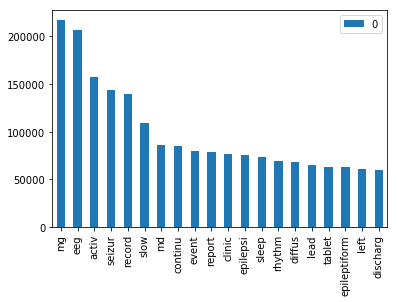

In [55]:
#get rid of stop words
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
filtered_words = [word for word in allwords_stemmed if word not in stopwords]

letter_counts = Counter(filtered_words)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df = df.sort_values(by=0, ascending=0)
df1 = df[:20]
plt.show(block=True)
df1.plot(kind='bar')

In [64]:
# most common bigrams
import nltk
from nltk import bigrams
report = allReports.lower()
reportNLTK = nltk.Text(nltk.tokenize.word_tokenize(report))
reportNLTK.collocations()

epileptiform discharges; standard international; electrode placements;
identifying information; stanford hospital; technical notes; possible
seizures; technically adequate; report identifying; movement leads;
referring dept; eye movement; ekg lead; test dates; adequate
activation; administered alertness; sensory stimulation; diffuse
slowing; single channel; digital nihon-kohden


In [65]:
# generate some eeg reports for me by sequencing bigrams
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

import nltk
from nltk.corpus import stopwords

#text = nltk.corpus.genesis.words('english-kjv.txt')
#print(type(text))
corpus = nltk.corpus.reader.plaintext.PlaintextCorpusReader(".", "allReports.txt")
words=corpus.words()
#get rid of stop words
#filtered_words = [word for word in words if word not in stopwords.words('english')]
#words = filtered_words

#print(type(words))
bigrams = nltk.bigrams(words)
cfd = nltk.ConditionalFreqDist(bigrams)
generate_model(cfd, 'seizure')
#filtered_words = [word for word in word_list if word not in stopwords.words('english')]

seizure . The record was continuous , and an EKG lead . The record was 

In [66]:
generate_model(cfd, 'epileptic')
print("")
generate_model(cfd, 'slow')
print("")
generate_model(cfd, 'discharge')
print("")
generate_model(cfd, 'periodic')
print("")
generate_model(cfd, 'impression')
print("")
generate_model(cfd, 'background')
print("")
generate_model(cfd, 'infantile')
print("")
generate_model(cfd, 'neonatal')
print("")
generate_model(cfd, 'seizure')
print("")
generate_model(cfd, 'seizures')
print("")
generate_model(cfd, 'This')
print("")
generate_model(cfd, 'electrographic')
print("")
generate_model(cfd, 'indicates')
print("")
generate_model(cfd, 'represent')
print("")
generate_model(cfd, 'generalized')
print("")
generate_model(cfd, 'slowing')
print("")
generate_model(cfd, 'focal')
print("")
generate_model(cfd, '3')
print("")
generate_model(cfd, 'hz')
print("")
generate_model(cfd, 'second')
print("")
generate_model(cfd, 'button')
print("")
generate_model(cfd, 'cry')
print("")
generate_model(cfd, 'clonic')
print("")
generate_model(cfd, 'tonic')
print("")
generate_model(cfd, 'partial')
print("")
generate_model(cfd, 'sleep')
print("")
generate_model(cfd, 'vertex')
print("")
generate_model(cfd, 'temporal')
print("")
generate_model(cfd, 'frontal')
print("")
generate_model(cfd, 'occipital')
print("")
#generate_model(cfd, 'hypsarrythmia')
#print("")
generate_model(cfd, 'alpha')
print("")
generate_model(cfd, 'beta')
print("")
generate_model(cfd, 'delta')
print("")
generate_model(cfd, 'theta')
print("")
generate_model(cfd, 'sudden')
print("")
generate_model(cfd, 'waxing')
print("")
generate_model(cfd, 'waning')

epileptic events and an EKG lead . The record was continuous , and an EKG 
slow activity . The record was continuous , and an EKG lead . The record 
discharge . The record was continuous , and an EKG lead . The record was 
periodic discharges . The record was continuous , and an EKG lead . The record 
impression . The record was continuous , and an EKG lead . The record was 
background consisted of the EEG machine , and an EKG lead . The record was 
infantile spasms , and an EKG lead . The record was continuous , and an 
neonatal seizures . The record was continuous , and an EKG lead . The record 
seizure . The record was continuous , and an EKG lead . The record was 
seizures . The record was continuous , and an EKG lead . The record was 
This is a digital Nihon - 20 electrode placements , and an EKG lead . 
electrographic seizures . The record was continuous , and an EKG lead . The record 
indicates cerebral dysfunction from a digital Nihon - 20 electrode placements , and an EKG 
rep

In [ ]:
#fraction of words in text that are not in the stopword list
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)

content_fraction(words)

#tutorial example of classification
import random
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] 

def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

#tutorial continued
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)) 
classifier.show_most_informative_features(5)

#tutorial
#what does it containt 
movie_reviews.categories()
movie_reviews.fileids('neg')
movie_reviews.categories()
i = 1
for doc in documents:
    print(str(i) + ": "+ doc[1])
    i += 1

from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
print(featuresets[1])


exclude = set(string.punctuation)
print(exclude)

In [57]:
#find the most common word associated with the interpretation result (abnormal versus normal)
#should take 10 mins
import random
import string
documents = list()
notebody = list()
result = list()
exclude = set(string.punctuation)
stopwords = nltk.corpus.stopwords.words('english')

with open("SHC_ALL_NOTES_IMPRESS.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        notebody = line['note'].lower()
        notebodyStemmed = tokenize_and_stem(notebody)        
        filtered_words = [word for word in notebodyStemmed if word not in stopwords]

        #notebody = ''.join(ch for ch in notebody if ch not in exclude)
        #notebody = notebody.split() 
        #notebody = [word for word in notebody if word not in stopwords.words('english')]
        category = line['impression']
        if (category == 'abnormal' or category == 'normal'):
            documents.append((list(filtered_words), category))

#documents[1]
        # print(desc)
        # now manipulate the note body

random.shuffle(documents)
#documents[1]


i = 1
for doc in documents:
    print(doc[0])
    i += 1
    break

In [ ]:
# constructing a list of the 2000 most frequent words in the overall corpus
import nltk
words = list()
for doc in documents:
    words += doc[0] 
    
#print(words)    
all_words = nltk.FreqDist(w for w in words)
word_features = list(all_words)[:4000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

for (d,c) in documents:
    print(c)
    

In [63]:
ccount = int (len(featuresets) / 2) - 1
#take half of the total as the training set and the other half as a test set
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[ccount:], featuresets[:ccount]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)) 
classifier.show_most_informative_features(30)

0.807882804325
Most Informative Features
contains(stimulus-induc) = True           abnorm : normal =     41.8 : 1.0
 contains(norepinephrin) = True           abnorm : normal =     34.9 : 1.0
 contains(centro-tempor) = True           abnorm : normal =     21.5 : 1.0
    contains(maxalt-mlt) = True           normal : abnorm =     17.9 : 1.0
      contains(accommod) = True           normal : abnorm =     16.2 : 1.0
      contains(cigarett) = True           normal : abnorm =     13.8 : 1.0
       contains(letharg) = True           abnorm : normal =     13.4 : 1.0
       contains(ela-max) = True           abnorm : normal =     12.8 : 1.0
           contains(emt) = True           normal : abnorm =     12.8 : 1.0
 contains(desvenlafaxin) = True           normal : abnorm =     12.8 : 1.0
       contains(cathflo) = True           abnorm : normal =     12.5 : 1.0
     contains(nonspecif) = True           abnorm : normal =     12.1 : 1.0
contains(temporal/centr) = True           abnorm : normal =

In [ ]:
for (d) in documents:
    print(d)
    break

14336


# in order to load a corpus, reports must be in separate files // don't need to run this again

capture_eegno = r'(?:DATE OF SERVICE:|STUDY DATE:|DATE EEG:|Date:|Service Date:|Study date|Study dates|DATE OF EEG:|start|T:|test dates:|Date of study:|Exam date|exam date:)\s*(?P<eegno>[\d/-]+)\s*'
capture_eegno1 = r'(?:Date:|Study date |Study date:)\s*(?P<eegno>(?:Jan|Feb|Mar|Apr|May|Jun|July|Aug|Sep|Oct|Nov|Dec)\s*[,\s\d/-]+)(?:[a-z]+)'
capture_eegno2 = r'(?<!DOB:  )(?P<eegno>[\d]+/[\d]+/[\d]+)' #DOB:  10/04/1993   
eegDateRange = r'(?P<eegno>[\d/]+-[\d/]+)'
eegDateStrict = r'(?P<eegno>[\d]+/[\d]+/[\d]+)'
#capture_eegno = r'(?P<eegno>[0-9]+)\s*'
re_eegno = re.compile(capture_eegno, re.DOTALL|re.MULTILINE|re.IGNORECASE)
re_eegno1 = re.compile(capture_eegno1, re.DOTALL|re.MULTILINE|re.IGNORECASE)
re_eegno2 = re.compile(capture_eegno2, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateRange = re.compile(eegDateRange, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateStrict = re.compile(eegDateStrict, re.DOTALL|re.MULTILINE|re.IGNORECASE)

out_file = open("lpch_eeg_reports_interp_date_impression.csv",'w')

i=2
with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    outfieldnames = reader.fieldnames
    outfieldnames.append('date')
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='***')
    writer.writeheader()
    
    for line in reader:
        eeg_no=""
        m = re_eegno.search(line['note'])
        print(str(i) + ": ", end='')
        #print(str(i) + ": " + str(type(m)), end='')
        if m:
            eeg_no = m.group('eegno')
            #print(eeg_no)
        else:
            m = re_eegno1.search(line['note'])
            if m:
                eeg_no = m.group('eegno')
                #print(eeg_no)
            else:
                #print("!!!!!!!!!!!")
                for match in re.finditer(capture_eegno2,line['note']):
                    eeg_no = match.group('eegno')
                    
                #m = re_eegno2.search(line['note'])
                #if m:
                #    eeg_no = m.group('eegno')
                #print(eeg_no +"???????")

        #if len(eeg_no) > 12:
        #    m = eegDateRange.search(eeg_no)            
        #    if m:
        #        print("bad")
        #        m = eegDateStrict.search(eeg_no)
        #        m = eegDateStrict.search(eeg_no)
        #        if m:
        #            eeg_no = m.group('eegno')
        if ((len(eeg_no) < 5) | (len(eeg_no) > 12)):
            #print("possibly bad: " + eeg_no)
            for match in re.finditer(capture_eegno2,line['note']):
                eeg_no = match.group('eegno')
        line['date'] = eeg_no 
        writer.writerow(line)
        
        #print(eeg_no)    
        #i += 1
        #if (i>600):
        #    break

In [ ]:
capture_eegno = r'(?:EEG TYPE:)\s*(?P<eegno>.+?)(?:history|report|clinical|condition|patient|location)'
capture_eegno1 = r'(?:Date:|Study date |Study date:)\s*(?P<eegno>(?:Jan|Feb|Mar|Apr|May|Jun|July|Aug|Sep|Oct|Nov|Dec)\s*[,\s\d/-]+)(?:[a-z]+)'
capture_eegno2 = r'(?<!DOB:  )(?P<eegno>[\d]+/[\d]+/[\d]+)' #DOB:  10/04/1993   
eegDateRange = r'(?P<eegno>[\d/]+-[\d/]+)'
eegDateStrict = r'(?P<eegno>[\d]+/[\d]+/[\d]+)'
#capture_eegno = r'(?P<eegno>[0-9]+)\s*'
re_eegno = re.compile(capture_eegno, re.DOTALL|re.IGNORECASE)
re_eegno1 = re.compile(capture_eegno1, re.DOTALL|re.MULTILINE|re.IGNORECASE)
re_eegno2 = re.compile(capture_eegno2, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateRange = re.compile(eegDateRange, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateStrict = re.compile(eegDateStrict, re.DOTALL|re.MULTILINE|re.IGNORECASE)

out_file = open("lpch_eeg_reports_interp_date_impression_type.csv",'w')

def detectType(eeg_no):
    if re.search("ambulatory", eeg_no, re.IGNORECASE):
        return "amb"
    if re.search("routine", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("routine", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("portable", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("spot", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("out", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("sleep", eeg_no, re.IGNORECASE):
        return "spot"
    if re.search("continuous", eeg_no, re.IGNORECASE):
        return "ltm"
    if re.search("video", eeg_no, re.IGNORECASE):
        return "ltm"
    if re.search("intraoperative", eeg_no, re.IGNORECASE):
        return "iom"
    if re.search("electrocort", eeg_no, re.IGNORECASE):
        return "iom"
    if re.search("amplitude", eeg_no, re.IGNORECASE):
        return "aeeg"
    if re.search("aeeg", eeg_no, re.IGNORECASE):
        return "aeeg"
    return ""

i=2
with open("lpch_eeg_reports_interp_date_impression.csv") as cf:
    reader = csv.DictReader(cf)
    outfieldnames = reader.fieldnames
    outfieldnames.append('type')
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='***')
    writer.writeheader()
    
    for line in reader:
        eeg_no=""
        m = re_eegno.search(line['note'])
        print(str(i) + ": ", end='')
        i += 1
        #print(str(i) + ": " + str(type(m)), end='')
        if m:
            eeg_no = m.group('eegno')
            eeg_no = detectType(eeg_no)
            
        if (len(eeg_no) == 0):
            eeg_no = detectType(line['note'])

        line['type'] = eeg_no
        
        writer.writerow(line)
        #if (i>1556): 
        #    break

In [ ]:
# in order to load a corpus, reports must be in separate files
from dateutil import parser

i=2
with open("lpch_eeg_reports_interp_date_impression.csv") as cf:
    reader = csv.DictReader(cf)
    
    for line in reader:
        date_str= line['date']
        try:
            dateObj = parser.parse(date_str)
            #print(dateObj.date())
            dateFile = (str(dateObj.date()))
            f = open("reports/" + dateFile + ".txt", "a+")
            f.write(line['note'])
            f.close()
        except:
            print("Unexpected error:", str(sys.exc_info()[0]) + date_str)

In [ ]:
import nltk
import os
from nltk.corpus import PlaintextCorpusReader

#fileids = os.listdir("reports")
corpus_root = 'reports'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:10])
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           for target in ['grda', 'gpd']
           if w.lower().startswith(target))
cfd.plot()

In [ ]:
cfd.tabulate(conditions=['grda','gpd'], samples=range(10), cumulative=True)

In [ ]:
#see if there are natural clusters, unsupervised
#ngram of word, each one is dimension of word, then 
#applied text analysis python machine learning approaches on slack

In [ ]:
# try tagging 

textAll_tokenized = list()
with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        #print(line['note'])
        text_raw = line['note'].lower()
        text_tokenized = nltk.tokenize.word_tokenize(text_raw)
        textAll_tokenized += text_tokenized
        #words = list(text_raw.split())
        #print(words)
        #break

text = nltk.Text(textAll_tokenized)
text_tagged = nltk.pos_tag(text)

        #print(text[10:200])
print(text.similar('alpha'))



which of these tags are the most common

Tag	Meaning	English Examples
ADJ	adjective	new, good, high, special, big, local
ADP	adposition	on, of, at, with, by, into, under
ADV	adverb	really, already, still, early, now
CONJ	conjunction	and, or, but, if, while, although
DET	determiner, article	the, a, some, most, every, no, which
NOUN	noun	year, home, costs, time, Africa
NUM	numeral	twenty-four, fourth, 1991, 14:24
PRT	particle	at, on, out, over per, that, up, with
PRON	pronoun	he, their, her, its, my, I, us
VERB	verb	is, say, told, given, playing, would

In [ ]:
nltk.help.upenn_tagset('NN.*')
nltk.help.upenn_tagset('JJ.*')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('JJ')


In [ ]:
tag_fd = nltk.FreqDist(tag for (word, tag) in text_tagged)
tag_fd.most_common()

In [ ]:
word_tag_pairs = nltk.bigrams(text_tagged)
#i = 0
#for (a, b) in word_tag_pairs:
#    print(b[1])
#    i += 1
#    if i>22:
#        break
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'JJ']
#print(noun_preceders)
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

In [ ]:
# what are teh most common verbs
word_tag_fd = nltk.FreqDist(text_tagged)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VB']

In [ ]:
# most likely words for a given tag VBN = 
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in text_tagged)
list(cfd2['VBN'])

In [ ]:
#find vbd (past tense) and VBN (past participle), find words which can be both and see surrounding text
nltk.help.upenn_tagset('VB.*')
cfd1 = nltk.ConditionalFreqDist(text_tagged)
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]
idx1 = text_tagged.index(('localized', 'VBD'))
print(text_tagged[idx1-4:idx1+1])
idx2 = text_tagged.index(('localized', 'VBN'))
print(text_tagged[idx2-4:idx2+1])